In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("usecase_1_.csv")

In [15]:
sample_data = ("sample_data.csv")

In [16]:
df.iloc[:100].to_csv(sample_data, index=False)

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents'],
      dtype='object')

In [6]:
correlationMatrix = df.corr(numeric_only=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

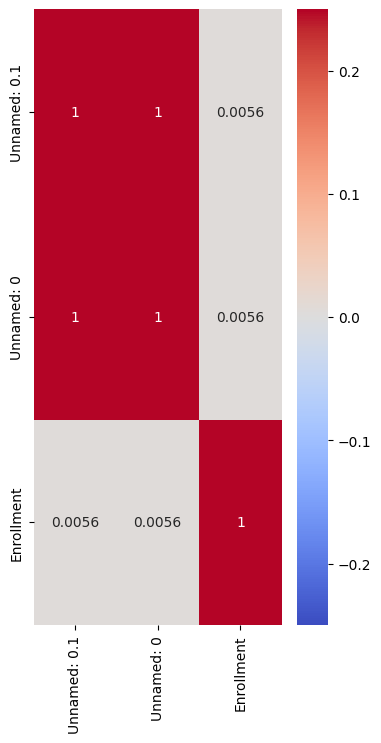

In [11]:
fig, ax = plt.subplots(figsize=(4, 8))
sns.heatmap(correlationMatrix,cmap='coolwarm', annot=True, vmax=0.25, vmin=-0.25)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117980 entries, 0 to 117979
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NCT Number                  117980 non-null  object
 1   Study Title                 117980 non-null  object
 2   Study Status                117980 non-null  object
 3   Brief Summary               117980 non-null  object
 4   Conditions                  117950 non-null  object
 5   Interventions               112324 non-null  object
 6   Primary Outcome Measures    114903 non-null  object
 7   Secondary Outcome Measures  93200 non-null   object
 8   Other Outcome Measures      7924 non-null    object
 9   Sex                         117838 non-null  object
 10  Age                         117980 non-null  object
 11  Phases                      83095 non-null   object
 12  Study Type                  117980 non-null  object
 13  Study Design                1

In [28]:
df.isna().sum()

NCT Number                         0
Study Title                        0
Study Status                       0
Brief Summary                      0
Conditions                        30
Interventions                   5656
Primary Outcome Measures        3077
Secondary Outcome Measures     24780
Other Outcome Measures        110056
Sex                              142
Age                                0
Phases                         34885
Study Type                         0
Study Design                     652
Secondary Measures                 0
dtype: int64

# Combining Columns

In [ ]:
df[['Secondary Outcome Measures','Other Outcome Measures','Secondary Measures']]

In [49]:
# df['Secondary Measures'] = (df['Secondary Outcome Measures'].fillna('') + ' ' + df['Other Outcome Measures'].fillna('')).str.strip()


In [41]:
import numpy as np

def combine_columns(dataframe, column1, column2):
    # Create a new column combining the two, but keeping rows as NaN if both values are NaN
    dataframe['Secondary Measures'] = dataframe.apply(
        lambda row: np.nan if pd.isna(row[column1]) and pd.isna(row[column2])
        else f"{row[column1] or ''} {row[column2] or ''}".strip(),
        axis=1
    )
    return dataframe


In [20]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','Study URL','Acronym','Study Results','Sponsor','Collaborators','Enrollment','Funder Type','Other IDs','Start Date','Primary Completion Date','Completion Date','First Posted','Results First Posted','Last Update Posted','Locations','Study Documents'],inplace=True)

In [46]:
df.drop(columns=['Secondary Outcome Measures','Other Outcome Measures'],inplace=True)